TASK 3


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)

# Simulated dataset similar to Bank Marketing
df = pd.DataFrame({
    'age': np.random.randint(18, 70, 1000),
    'job': np.random.choice(['admin', 'technician', 'blue-collar', 'services'], 1000),
    'marital': np.random.choice(['married', 'single', 'divorced'], 1000),
    'education': np.random.choice(['primary', 'secondary', 'tertiary'], 1000),
    'balance': np.random.normal(1000, 1500, 1000).astype(int),
    'housing': np.random.choice(['yes', 'no'], 1000),
    'loan': np.random.choice(['yes', 'no'], 1000),
    'y': np.random.choice([0, 1], 1000, p=[0.7, 0.3])  # target: 0=no, 1=yes
})


In [3]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'housing', 'loan'], drop_first=True)

# Features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [5]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84       146
           1       0.25      0.02      0.03        54

    accuracy                           0.72       200
   macro avg       0.49      0.50      0.44       200
weighted avg       0.60      0.72      0.62       200



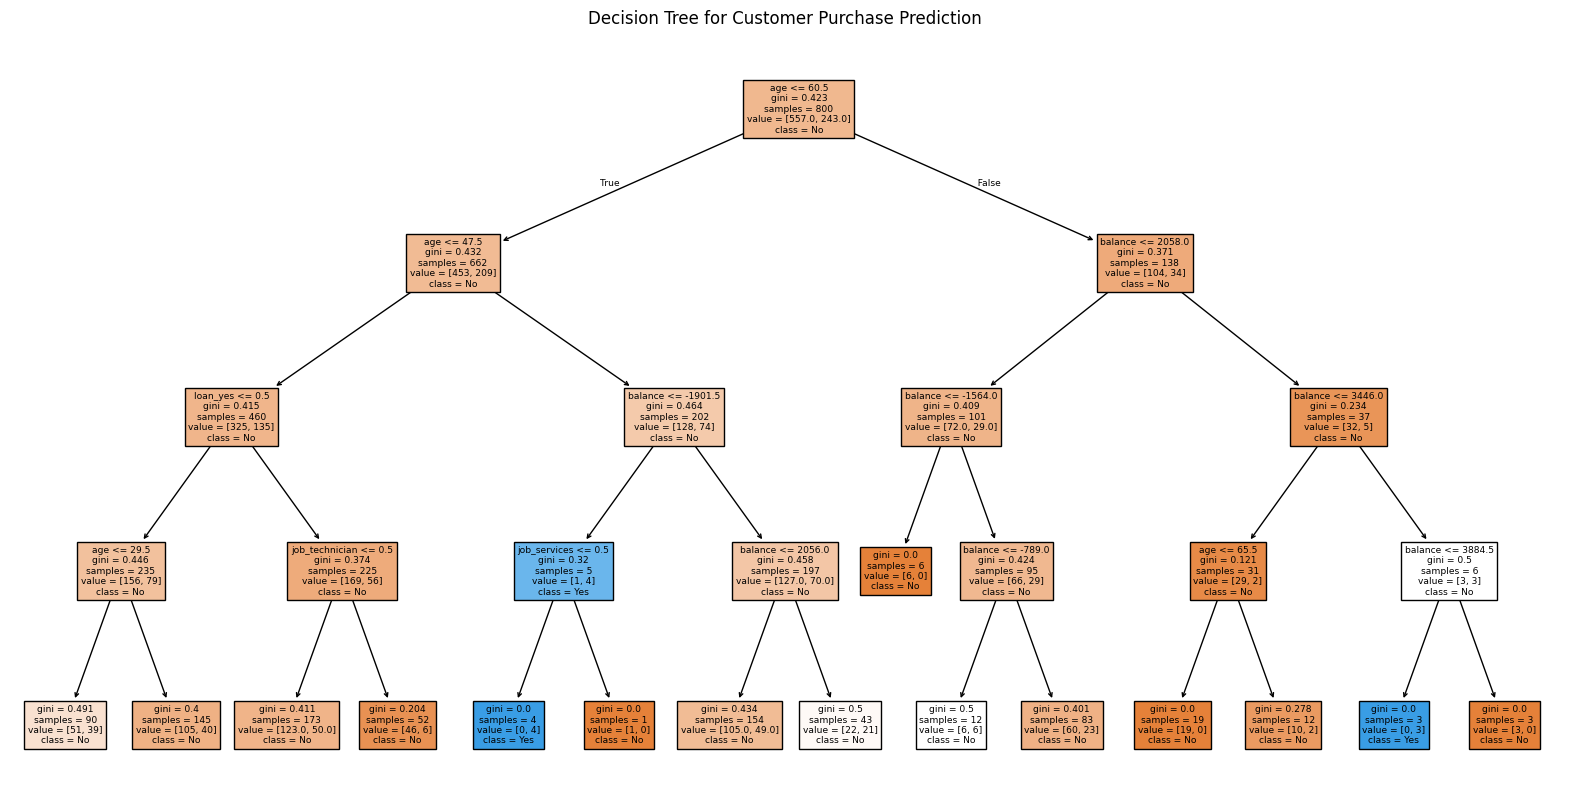

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for Customer Purchase Prediction")
plt.show()
